In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql

In [2]:
conn = pymysql.connect(host='39.97.127.183', user='root', password='123456', database='pymysql——demo',
                               port=3306,charset="utf8mb4")
cursor = conn.cursor()
print('连接成功')

连接成功


In [6]:
df=pd.read_sql('select *from kaoyan_tiaoji',conn)
df

,id,total_score,major,info,date
0,1,270.0,光学工程,光学工程相关或相近专业,2020-03-17
1,2,273.0,机械电子工程,均可,2020-03-17
2,3,314.0,药学专硕,医药相关专业全日制,2020-03-10
3,4,357.0,英语笔译,希望调剂到A、B区的英语笔译及相关专业,2020-03-17
4,5,337.0,环境工程,环境工程相关类专业,2020-03-10
...,...,...,...,...,...
11960,11961,362.0,应用统计,应用统计,2020-02-20
11961,11962,357.0,金融专硕0251,经济类专业,2020-02-20
11962,11963,232.0,(专业学位)会计(12530..,会计专硕/审计专硕,2020-02-20
11963,11964,318.0,法律硕士（非法学）,b区院校，全日制,2020-02-19


In [9]:
df1=df[df['date']>'2020-01-01']

In [13]:
df2=df[df['major'].str.contains('非法学')]
df2

,id,total_score,major,info,date
88,89,338.0,法硕（非法学）,接受一切调剂,2020-03-18
230,231,338.0,法硕（非法学）,接受一切调剂,2020-03-15
393,394,309.0,法律（非法学）,法律（非法学）,2020-03-18
441,442,351.0,法律（非法学）,法律（非法学）,2020-03-01
506,507,316.0,法律（非法学）,法律硕士（非法学）调剂哪个学校都可以,2020-03-07
...,...,...,...,...,...
11856,11857,317.0,法律硕士（非法学）全..,A区B区均可,2020-02-12
11872,11873,311.0,法硕非法学,a区 b区都可以,2020-02-20
11873,11874,311.0,法硕非法学,a区 b区都可以,2020-02-20
11908,11909,317.0,法律（非法学）,法律（非法学）,2020-02-10


In [18]:
df3=df2[df2['total_score']>0]
df3

,id,total_score,major,info,date
88,89,338.0,法硕（非法学）,接受一切调剂,2020-03-18
230,231,338.0,法硕（非法学）,接受一切调剂,2020-03-15
393,394,309.0,法律（非法学）,法律（非法学）,2020-03-18
441,442,351.0,法律（非法学）,法律（非法学）,2020-03-01
506,507,316.0,法律（非法学）,法律硕士（非法学）调剂哪个学校都可以,2020-03-07
...,...,...,...,...,...
11856,11857,317.0,法律硕士（非法学）全..,A区B区均可,2020-02-12
11872,11873,311.0,法硕非法学,a区 b区都可以,2020-02-20
11873,11874,311.0,法硕非法学,a区 b区都可以,2020-02-20
11908,11909,317.0,法律（非法学）,法律（非法学）,2020-02-10


In [21]:
df4=df3.sort_values(by='total_score')
df4

,id,total_score,major,info,date
6485,6486,236.0,法硕非法学,法硕（非法学）,2020-02-23
5939,5940,238.0,法硕(非法学),a区b区都可以,2020-02-23
5952,5953,238.0,法硕(非法学),接受法律硕士调剂,2020-02-23
2042,2043,244.0,法律（非法学）,都可以，非全日制,2020-03-03
3576,3577,246.0,法律非法学,法律非法学,2020-02-26
...,...,...,...,...,...
4888,4889,356.0,法律硕士（非法学）,服从调剂,2018-02-11
10623,10624,359.0,法律硕士（非法学）,A区院校,2020-02-20
10761,10762,361.0,法律硕士（非法学）,A区院校985或211最好,2020-02-20
10762,10763,365.0,法律（非法学）,全日制相关专业,2020-02-20


In [25]:
df4['total_score'].describe()

count    214.000000
mean     325.084112
std       21.923949
min      236.000000
25%      317.000000
50%      328.000000
75%      337.750000
max      365.000000
Name: total_score, dtype: float64

In [31]:
scores = np.random.randint(0, 100, 100)
scores

array([95, 79, 27, 95, 17, 19, 67, 19, 89, 31, 13, 71, 66,  9, 52, 72, 31,
       28, 32, 57,  4, 41, 96, 59, 80, 36, 97, 84, 26, 96, 45, 77, 90, 63,
       61, 51, 15, 60, 34, 87, 18, 60, 81,  7, 13, 49, 20, 28, 12, 50, 70,
       19, 60, 54, 85, 93, 57, 30, 35, 87, 92, 57, 65, 35, 48, 82, 78, 10,
       25, 91, 81, 36, 66, 69, 16, 52, 99, 60, 91, 31, 73, 71,  1, 45, 38,
       26, 61, 42, 15, 10, 68, 54, 37, 79, 70, 41, 93, 50, 77, 27])

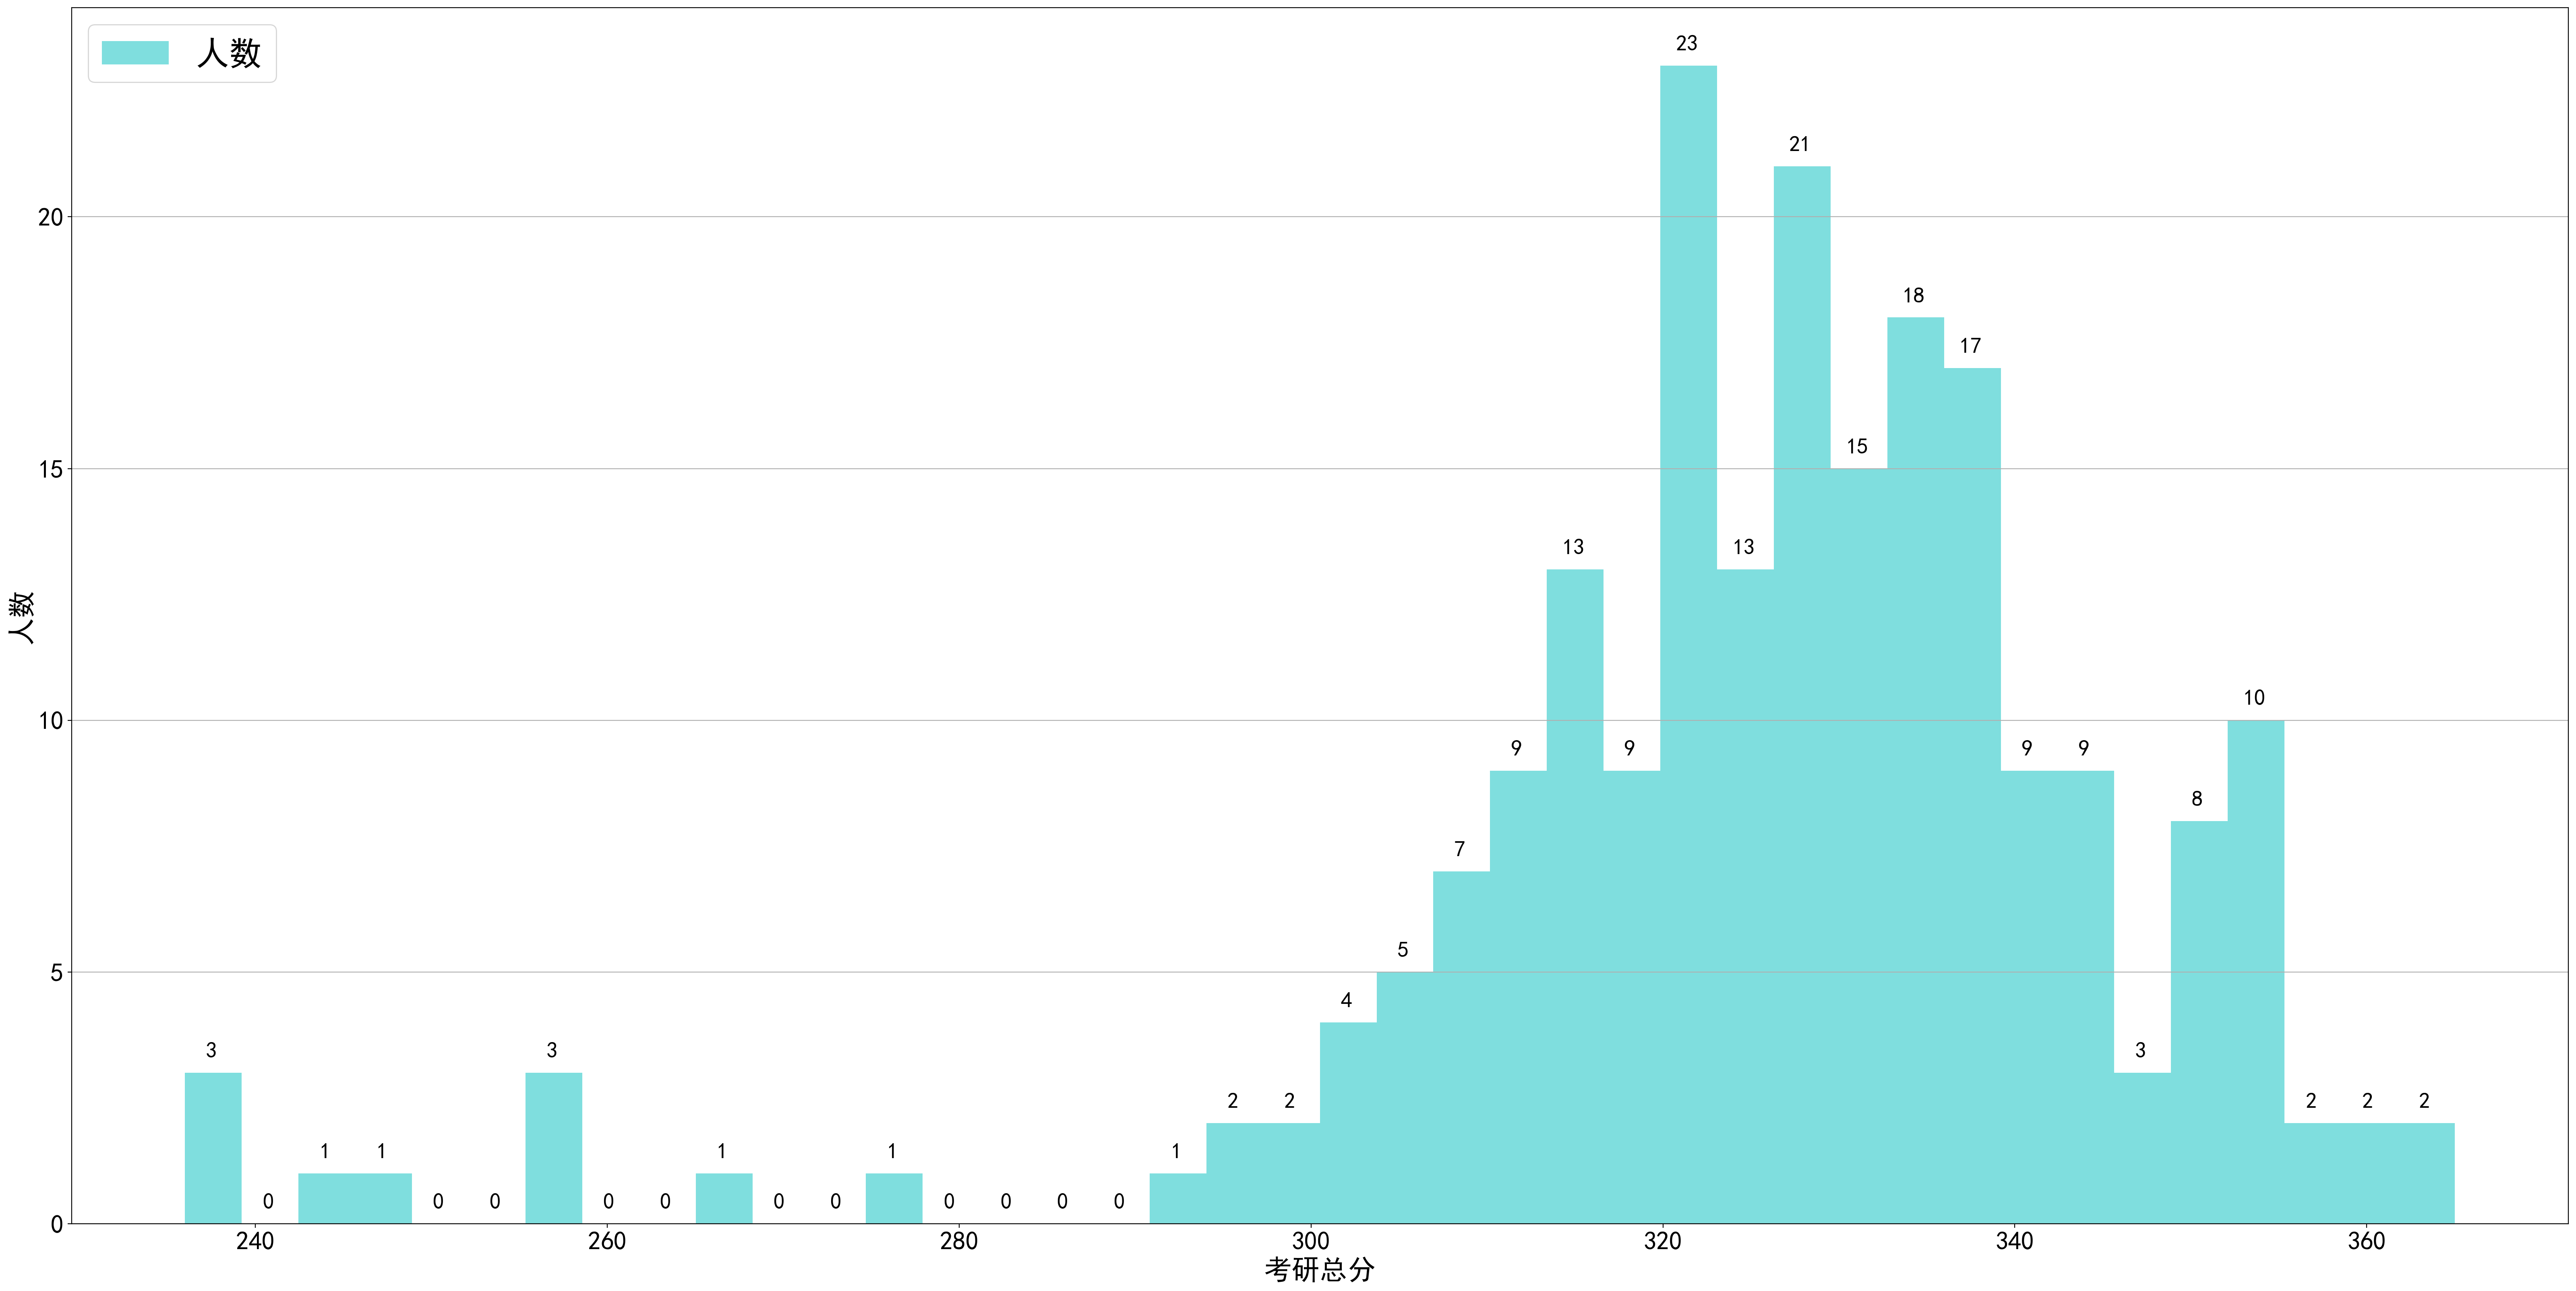

In [126]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(40, 20), dpi=200)

x = df['id']
y = df4['total_score']
bar_width = 40
rects = plt.hist(
    y,
    bar_width,
    histtype='bar',
    rwidth=10,
    alpha=0.5,
    color='c',
    label='人数'
)
plt.tick_params(labelsize=23)
plt.grid(axis='y')

for height, location in zip(rects[0], rects[1]):
    height = int(height)
    plt.text(location+1.5, height+0.3, str(height), ha='center', size=20)
plt.xlabel('考研总分', size=25)
plt.ylabel('人数', size=25)
plt.legend(loc='upper left',fontsize=30)


plt.show()

In [146]:
from wordcloud import WordCloud
import PIL.Image as image
i = 1
image = plt.imread('1.jpg')
print('*'*100)
content = df4['info']
sw = set()
sw.add('法律')
sw.add('法硕')
sw.add('法律硕士')

sw.add("非法学")
c = ''.join(content).strip('')
print(c)
wc = WordCloud(
    font_path=r'D:\python\py3.7\Lib\site-packages\wordcloud\simhei.ttf',
    background_color='black',
    max_words=300,
    scale=4,
    stopwords=sw,  # 设置停用词
    mask=image,
    random_state=30  # 设置有多少种随机生成状态，即有多少种配色方案

).generate(c)
wc.to_file('2233.png')
i += 1
print('-'*100)
print(i)

****************************************************************************************************
法硕（非法学）a区b区都可以接受法律硕士调剂都可以，非全日制法律非法学调剂退役士兵计划的法律非法学专业专硕调剂退役士兵计划院校的法律非法学专业接受任何可以调剂到的学校调剂到b区调剂到非全日制非法学不分地区不分学校法硕(非法学)少干考生，生源辽宁，户籍云南，接受任何..能上法硕(非法学)就行打算调剂到A区或B区非全日制B区院校就行~期待去新疆本人希望调剂到b区的学校云南财经大学 云南师范大学 云南大学 广西大学 新疆大..愿意调剂到B区任意一所学校 非常喜欢法学专业！本人获得司法考试A证，本人在校期间刻苦勤奋，吃苦耐..本一B区一切学校接受一切调剂安排，一定报道接受一切B区一切调剂，一定参加复试并报道。有学上就可以了有学上就行内蒙古科技大学法学院B区一本全日制或者211非全内蒙古科技大学法学院法律（非法学）任何学校贵州民族大学、广州大学、延边大学等，只要给机会就来..a区 b区都可以b区院校都可以自己想上全日制最好全日制a区 b区都可以法硕（非法学）新疆 海南 宁夏 广西 甘肃 青海 内蒙都可以浙江312分调剂b区接受一切调剂无任何要求  有学校接受即可同意法硕非法学法律相关均可法律相关专业所有招收少干的院校211大学及以上法硕（非法学）专业最好是a区的学校  ，因为离家近  b区也接受接受一切调剂法律硕士（非法学）调剂哪个学校都可以法律硕士（非法学）调剂哪个学校都可以法律硕士（非法学）调剂哪个学校都可以法律硕士（非法学）调剂A区B区均可法律（非法学）a区b区都可以a区b区都可以北京法律非法学b区相关专业即可b区院校，全日制有学校可以上就好AB区都行只要是南方A区法硕专业B区华东师范大学全日制法律硕士全日制法律硕士接受任何调剂服从一切调剂法学（非法学）A区学校，已过六级接受任何调剂只想有书读接受任何调剂江浙皖附近A区学校，已过六级A类B类都可以求学校给我一个读书的机会b区法律高校，偏向刑法学和法制史研究方向求各法律高校恩赐给我一个读书的机会均可求各法律高校恩赐给我一个读书的机会法硕非法学全日制求法律类专业院校给我一个读书的机会南昌的学校北京所有招收法硕非法本的学校哪个学